# Let's Create a NN with Keras to fit some Models

In [1]:
from tensorflow import keras
from matplotlib import pyplot as plt # To do graphs
from tensorflow.keras.layers import Dense, Activation 
from tensorflow.keras.models import Sequential
from sklearn.datasets import make_moons # To create train data to fit the model
import numpy as np


### Keras 
- High level deep learning API that let's you easily build, train and evaluate neural networks



#### Train a model in 3 steps:

1.**Define model, specify:**

- architecture
- number of neurons
- layers
- type of activation function


2. **Compile the model, specify:**

- optimizers
- metrics
- loss function

3. **Fit the model, specify:**

- epochs (number of iterations of the dataset in backpropagation)
- batch size (the data is fed in layers / batches; not all at once)

# Part 1: Creating a NN that makes binary-classifications

In [2]:
X, y=make_moons(500, noise=0.2)

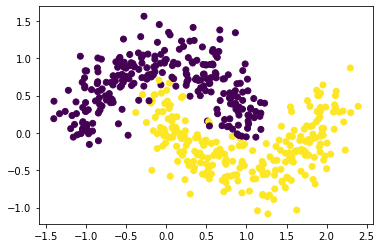

In [54]:
plt.scatter(X[:,0], X[:,1], c=y);

## **Step 1: Definition of the Arquitechture. Building of a model with just 2 Dense layers**

In [5]:
m = Sequential([ 
                Dense(units=4, activation='relu', input_shape=(2,)),   #Activation function = ReLu (Rectified Linear Unit), 4 Nodes, input_shape =(2,) means points (x,y as input)
                Dense(units = 1, activation='sigmoid')]) # Activation function = Sigmoid, 1 Node, 

## **Step 2: Compilation of the Model. Choosing of a loss function, different Optmizers and evaluation metric**

### Optimizers:
    * SGD = Stochastic Gradient Descent with constant learning rate
    * RMSProp = adaptive learning rate; it decays exponentially based on 2 previous steps.
    * Momentum = interprets the gradient as acceleration, usually converges faster, may oscillate around the minimum.
    * Adam = combination of RMSProp and Momentum Optimization. Probably the best of the above.

### Loss functions:
    * MSE =  Minimal Square Error--> Linear Regressions
    * Categorical-Cross-Entropy = Multiclass Classifications
    * log-loss / binary-cross-entropy = binary classification


### **Step 3.1: Fitting of the model with "Adam" Optimizer**

In [6]:
m.compile(optimizer='adam',  
          loss='binary_crossentropy', 
          metrics=['accuracy']) 

In [45]:
m.summary() # The number of parameters of the dense layers are the inputs x nodes = first case 4 nodes x 3 inputs (x,y, category) = 12 for the second layer = 5 = w1,w2,w3,w4 + bias

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 4)                 12        
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 5         
Total params: 17
Trainable params: 17
Non-trainable params: 0
_________________________________________________________________


In [8]:
h_adam = m.fit( X, y, epochs=1000, batch_size = 50, validation_split = 0.20) # Here I decide HOW to train the NN. In this case are 1000 epochs (epochs is when the entire dataset is passed forward and backward through the neural network )
                                                                        # Taking 50 points as batch_size (batch_size hyperparameter that defines number of samples to work) each time and leaving 20% as validation data (test)

Epoch 1/1000
8/8 [==============================] - 0s 18ms/step - loss: 1.0680 - accuracy: 0.1975 - val_loss: 1.1144 - val_accuracy: 0.1300
Epoch 2/1000
8/8 [==============================] - 0s 3ms/step - loss: 1.0504 - accuracy: 0.2000 - val_loss: 1.0940 - val_accuracy: 0.1400
Epoch 3/1000
8/8 [==============================] - 0s 3ms/step - loss: 1.0334 - accuracy: 0.1925 - val_loss: 1.0743 - val_accuracy: 0.1400
Epoch 4/1000
8/8 [==============================] - 0s 3ms/step - loss: 1.0167 - accuracy: 0.1975 - val_loss: 1.0558 - val_accuracy: 0.1500
Epoch 5/1000
8/8 [==============================] - 0s 3ms/step - loss: 1.0011 - accuracy: 0.1975 - val_loss: 1.0380 - val_accuracy: 0.1500
Epoch 6/1000
8/8 [==============================] - 0s 3ms/step - loss: 0.9865 - accuracy: 0.2000 - val_loss: 1.0207 - val_accuracy: 0.1500
Epoch 7/1000
8/8 [==============================] - 0s 3ms/step - loss: 0.9721 - accuracy: 0.2025 - val_loss: 1.0043 - val_accuracy: 0.1500
Epoch 8/1000
8/8 [=

#### **Evaluation of the model**

In [42]:
score_adam = m.evaluate(X, y)
print(score_adam)

16/16 [==============================] - 0s 1000us/step - loss: 0.2712 - accuracy: 0.8740
[0.27118414640426636, 0.8740000128746033]


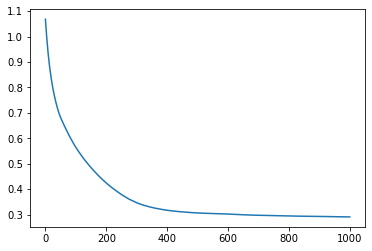

In [43]:
#Plot the learning curve
plt.plot(h_adam.history['loss']);

''

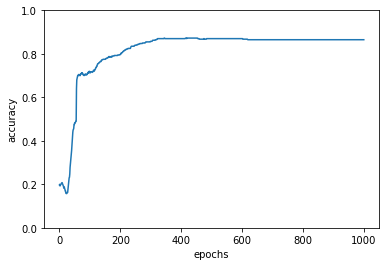

In [73]:
plt.plot(h_adam.history['accuracy'])
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.ylim(0,1)
;


In [72]:
max(h_adam.history['accuracy'])

0.8725000023841858

### **Step 3.2: Fitting of the model with "RMSProp" Optimizer**

In [56]:
m_rms = Sequential([ 
                Dense(units=4, activation='relu', input_shape=(2,)),   #Activation function = ReLu (Rectified Linear Unit), 4 Nodes, input_shape =(2,) means points (x,y as input)
                Dense(units = 1, activation='sigmoid')]) # Activation function = Sigmoid, 1 Node, 

In [57]:
m_rms.compile(optimizer='RMSProp',  
          loss='binary_crossentropy', 
          metrics=['accuracy']) 

In [58]:
h_rms = m_rms.fit( X, y, epochs=1000, batch_size = 50, validation_split = 0.20) # Here I decide HOW to train the NN. In this case are 1000 epochs (epochs is when the entire dataset is passed forward and backward through the neural network )
                                                                        # Taking 50 points as batch_size (batch_size hyperparameter that defines number of samples to work) each time and leaving 20% as validation data (test)

Epoch 1/1000
8/8 [==============================] - 0s 13ms/step - loss: 0.8710 - accuracy: 0.2075 - val_loss: 0.8624 - val_accuracy: 0.1300
Epoch 2/1000
8/8 [==============================] - 0s 3ms/step - loss: 0.8573 - accuracy: 0.2150 - val_loss: 0.8504 - val_accuracy: 0.1500
Epoch 3/1000
8/8 [==============================] - 0s 3ms/step - loss: 0.8470 - accuracy: 0.2250 - val_loss: 0.8396 - val_accuracy: 0.1700
Epoch 4/1000
8/8 [==============================] - 0s 3ms/step - loss: 0.8376 - accuracy: 0.2425 - val_loss: 0.8294 - val_accuracy: 0.1900
Epoch 5/1000
8/8 [==============================] - 0s 3ms/step - loss: 0.8284 - accuracy: 0.2550 - val_loss: 0.8194 - val_accuracy: 0.2000
Epoch 6/1000
8/8 [==============================] - 0s 3ms/step - loss: 0.8196 - accuracy: 0.2750 - val_loss: 0.8098 - val_accuracy: 0.2500
Epoch 7/1000
8/8 [==============================] - 0s 3ms/step - loss: 0.8108 - accuracy: 0.3525 - val_loss: 0.8000 - val_accuracy: 0.5200
Epoch 8/1000
8/8 [=

In [59]:
score_rms = m_rms.evaluate(X, y)
print(score_rms)

16/16 [==============================] - 0s 1ms/step - loss: 0.2293 - accuracy: 0.8980
[0.2292550951242447, 0.8980000019073486]


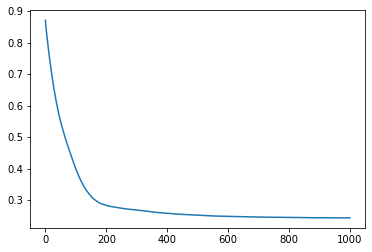

In [60]:
plt.plot(h_rms.history['loss']);

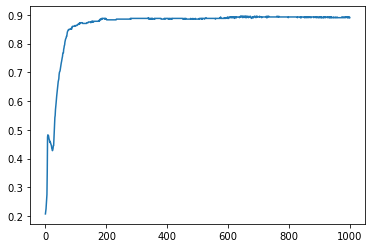

In [61]:
plt.plot(h_rms.history['accuracy']);

In [70]:
max(h_rms.history['accuracy'])

0.8949999809265137

### **Step 3.3: Fitting of the model with "SGD" Optimizer**

In [62]:
m_sgd = Sequential([ 
                Dense(units=4, activation='relu', input_shape=(2,)),   #Activation function = ReLu (Rectified Linear Unit), 4 Nodes, input_shape =(2,) means points (x,y as input)
                Dense(units = 1, activation='sigmoid')]) # Activation function = Sigmoid, 1 Node, 

In [63]:
m_sgd.compile(optimizer='SGD',  
          loss='binary_crossentropy', 
          metrics=['accuracy']) 

In [64]:
h_sgd = m_sgd.fit( X, y, epochs=1000, batch_size = 50, validation_split = 0.20) # Here I decide HOW to train the NN. In this case are 1000 epochs (epochs is when the entire dataset is passed forward and backward through the neural network )
                                                                        # Taking 50 points as batch_size (batch_size hyperparameter that defines number of samples to work) each time and leaving 20% as validation data (test)

Epoch 1/1000
8/8 [==============================] - 0s 14ms/step - loss: 0.6581 - accuracy: 0.5500 - val_loss: 0.6285 - val_accuracy: 0.5800
Epoch 2/1000
8/8 [==============================] - 0s 3ms/step - loss: 0.6453 - accuracy: 0.5600 - val_loss: 0.6171 - val_accuracy: 0.6300
Epoch 3/1000
8/8 [==============================] - 0s 3ms/step - loss: 0.6337 - accuracy: 0.5850 - val_loss: 0.6069 - val_accuracy: 0.6400
Epoch 4/1000
8/8 [==============================] - 0s 3ms/step - loss: 0.6231 - accuracy: 0.6125 - val_loss: 0.5977 - val_accuracy: 0.6400
Epoch 5/1000
8/8 [==============================] - 0s 3ms/step - loss: 0.6137 - accuracy: 0.6225 - val_loss: 0.5891 - val_accuracy: 0.6500
Epoch 6/1000
8/8 [==============================] - 0s 3ms/step - loss: 0.6051 - accuracy: 0.6450 - val_loss: 0.5812 - val_accuracy: 0.6900
Epoch 7/1000
8/8 [==============================] - 0s 3ms/step - loss: 0.5974 - accuracy: 0.6700 - val_loss: 0.5739 - val_accuracy: 0.7300
Epoch 8/1000
8/8 [=

In [65]:
score_sgd = m_sgd.evaluate(X, y)
print(score_sgd)

16/16 [==============================] - 0s 1000us/step - loss: 0.2550 - accuracy: 0.8840
[0.2550138831138611, 0.8840000033378601]


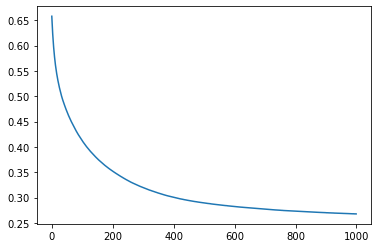

In [66]:
plt.plot(h_sgd.history['loss']);

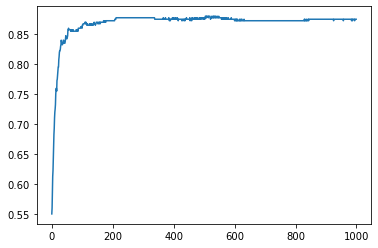

In [67]:
plt.plot(h_sgd.history['accuracy']);

In [79]:
print(max(h_sgd.history['accuracy']),max(h_rms.history['accuracy']),max(h_adam.history['accuracy']))

0.8799999952316284 0.8949999809265137 0.8725000023841858


In [82]:
print(h_sgd.history['accuracy'][100], h_rms.history['accuracy'][100],h_adam.history['accuracy'][100])

0.8650000095367432 0.862500011920929 0.7124999761581421


In [80]:
print(h_sgd.history['accuracy'][150], h_rms.history['accuracy'][150],h_adam.history['accuracy'][150])

0.8700000047683716 0.875 0.7749999761581421


In [81]:
print(h_sgd.history['accuracy'][200], h_rms.history['accuracy'][200],h_adam.history['accuracy'][200])

0.8725000023841858 0.8849999904632568 0.7975000143051147


### In conclusion changing the optimizers doesn't change the final accurracy score significantly. The winner in this case is the RMSProp but SGD has a faster improvement in the accurracy. In this case the cost of calculation is low but it worth to take into account this behaviour for future analysis.

## Here finishes the first part

-----

# Part 2: Creating a NN that recognices a handwritten Number (Working with MNIST Data)


In [83]:
from tensorflow.keras.datasets import mnist

**Step 1: Download and split the data in train-test**

In [84]:
(xtrain, ytrain), (xtest, ytest) = mnist.load_data()

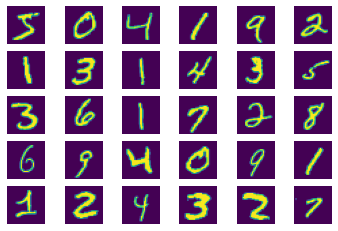

In [86]:
for i in range(30):
        plt.subplot(5, 6, i+1) # it means 4 files, 5 columns and the position
        plt.imshow(xtrain[i])
        plt.axis('off')

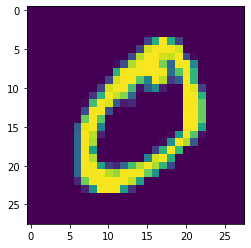

In [88]:
plt.imshow(xtrain[1]);

In [101]:
print(xtrain.shape,xtest.shape,ytrain.shape,ytest.shape) #The train data has 60.000 images of 28x28 pixels

(60000, 28, 28) (10000, 28, 28) (60000,) (10000,)


In [102]:
print(type(xtrain),type(ytrain))

<class 'numpy.ndarray'> <class 'numpy.ndarray'>


### **Step 2: Defining the Arquitechture**

This model is going to have 3 dense layers and this kind of layers requires data as an 1D-array. So we need to re-shape the 28x28 into 1D of 28x28=784 (flatten). The "y" needs to be one-hot-encoded to fit the SoftMax activation function.

In [103]:
xtrain_flat = xtrain.reshape((60000, 28*28))
xtrain.shape, xtrain_flat.shape

((60000, 28, 28), (60000, 784))

In [105]:
xtest_flat = xtest.reshape((10000, 28*28))
xtest.shape, xtest_flat.shape

((10000, 28, 28), (10000, 784))

In [106]:
ytrain_one_hot = keras.utils.to_categorical(ytrain)
ytrain.shape, ytrain_one_hot.shape

((60000,), (60000, 10))

In [107]:
model = keras.models.Sequential([
    
    keras.layers.Dense(
        units=64,                                  # units=neurons=nodes="number of output features"
        activation=keras.activations.relu,
        input_shape=(784, )                      # number of features of your input data
    ), 
    # activation(np.dot(X, w))
    keras.layers.Dense(
        units=32,                                  
        activation=keras.activations.relu,
    ),  
    # output layer
    keras.layers.Dense(
        units=10,                                  #activation function SoftMax, for multiple-cathegorical-classifications.
        activation=keras.activations.softmax    
    )    
])

In [108]:
model.summary() # 64 nodes * 784 inputs + 64 connections of the bias term for the first Layer, same logic for the next layers.

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_9 (Dense)              (None, 64)                50240     
_________________________________________________________________
dense_10 (Dense)             (None, 32)                2080      
_________________________________________________________________
dense_11 (Dense)             (None, 10)                330       
Total params: 52,650
Trainable params: 52,650
Non-trainable params: 0
_________________________________________________________________


## **Step 3: Compiling the model**

In [110]:
model.compile(
    optimizer=keras.optimizers.Adam(learning_rate=0.001),     # Algorithm for numerical optimization --> Adam
    loss=keras.losses.CategoricalCrossentropy(),              # Loss function --> multicategorical classifications 
    metrics=[keras.metrics.CategoricalAccuracy()])            # Evaluation metric--> accurracy

## **Step 4: Fitting the model**

In [115]:
results = model.fit(xtrain_flat, ytrain_one_hot, 
              epochs=10,            # number of iterations through the complete dataset 
              batch_size=128,        # number of observation used for calculating the gradient
              validation_split=0.2  # 20% of the data is reserved for validation
)

Epoch 1/10
375/375 [==============================] - 1s 2ms/step - loss: 0.0253 - categorical_accuracy: 0.9920 - val_loss: 0.2949 - val_categorical_accuracy: 0.9638
Epoch 2/10
375/375 [==============================] - 1s 2ms/step - loss: 0.0265 - categorical_accuracy: 0.9923 - val_loss: 0.2855 - val_categorical_accuracy: 0.9653
Epoch 3/10
375/375 [==============================] - 1s 2ms/step - loss: 0.0233 - categorical_accuracy: 0.9932 - val_loss: 0.3032 - val_categorical_accuracy: 0.9658
Epoch 4/10
375/375 [==============================] - 1s 1ms/step - loss: 0.0251 - categorical_accuracy: 0.9929 - val_loss: 0.3101 - val_categorical_accuracy: 0.9675
Epoch 5/10
375/375 [==============================] - 1s 1ms/step - loss: 0.0237 - categorical_accuracy: 0.9929 - val_loss: 0.3029 - val_categorical_accuracy: 0.9657
Epoch 6/10
375/375 [==============================] - 1s 2ms/step - loss: 0.0185 - categorical_accuracy: 0.9944 - val_loss: 0.3328 - val_categorical_accuracy: 0.9647
Epoc

### Evaluate the model

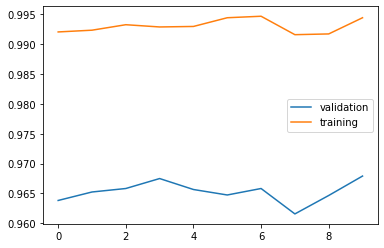

In [117]:
plt.plot(results.history['val_categorical_accuracy'], label='validation')
plt.plot(results.history['categorical_accuracy'], label='training')
plt.legend();

In [142]:
print(round((results.history['val_categorical_accuracy'][-1]-results.history['categorical_accuracy'][-1]), 3)*100)
# With less than 3% of difference between the train data and the test data I consider the model NOT to be Overfitted.

-2.6
